# import TN data

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
#http://www.countyhealthrankings.org/app/tennessee/2018/rankings/outcomes/overall, year = 2017
chrr_tn = pd.read_excel(r'./data/2017_CountyHealthRankingsTennesseeData-v2.xls', 
                        sheet_name='Ranked Measure Data', skiprows=[0,2])
chrr_tn.head()

,FIPS,State,County,# Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Z-Score,% Fair/Poor,95% CI - Low.1,...,95% CI - High.20,Z-Score.33,% Drive Alone - Black,% Drive Alone - Hispanic,% Drive Alone - White,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.21,95% CI - High.21,Z-Score.34
0,47001,Tennessee,Anderson,1300,9749.0,8921.8,10576.3,-0.098022,20.026671,19.305510,...,89.051304,0.888787,97.664169,NaN,89.486674,27064,30.6,28.064058,33.135942,-0.683316
1,47003,Tennessee,Bedford,673,9113.2,8137.1,10089.4,-0.449386,22.398967,21.661805,...,84.449866,-1.210049,78.755187,74.116077,80.140845,15765,34.9,30.577668,39.222332,-0.278245
2,47005,Tennessee,Benton,414,13506.4,11391.7,15621.0,1.978441,23.714235,22.836373,...,88.385007,-0.309080,NaN,NaN,83.664510,4736,30.0,24.908561,35.091439,-0.739838
3,47007,Tennessee,Bledsoe,221,8405.9,6690.4,10121.4,-0.840263,22.291027,21.500580,...,84.448692,-1.624633,NaN,NaN,72.621564,3727,54.3,44.510191,64.089809,1.549287
4,47009,Tennessee,Blount,1842,8011.6,7440.5,8582.7,-1.058166,18.410149,17.745401,...,86.658214,0.276912,87.743733,81.336544,85.133685,47280,35.9,33.559095,38.240905,-0.184042


## subset data and visualize

### cancer-relevant data

In [121]:
#subset by columns I think are interesting for cancer and fill null values with median
cancer_tn = chrr_tn[['County', '% Fair/Poor', 
 'Mentally Unhealthy Days', '% Smokers', 
'% Obese', '% Physically Inactive', '% With Access', '% Excessive Drinking', 
'% Uninsured', 
'Preventable Hosp. Rate', 'Graduation Rate', '% Some College', '% Children in Poverty', 
'Association Rate', 
'Average Daily PM2.5', '% Severe Housing Problems', 
'% Long Commute - Drives Alone', 'Presence of violation']]

cancer_tn.columns = ['county', '% Fair/Poor health', 'Mentally Unhealthy Days', '% Smokers', 
'% Obese', '% Physically Inactive', '% With Access to exercise', '% Excessive Drinking', 
 '% Uninsured', 
'Preventable Hosp. Rate', 'Graduation Rate', '% Some College', '% Children in Poverty',  
 'Social Association Rate', 
'air pollution rate PM2.5', '% Severe Housing Problems', 
'% Long Commute - Drives Alone', 'drinking water violation']
cancer_tn = cancer_tn.set_index('county')

cancer_tn = cancer_tn.fillna(cancer_tn.median())
cancer_tn.isnull().sum()

% Fair/Poor health               0
Mentally Unhealthy Days          0
% Smokers                        0
% Obese                          0
% Physically Inactive            0
% With Access to exercise        0
% Excessive Drinking             0
% Uninsured                      0
Preventable Hosp. Rate           0
Graduation Rate                  0
% Some College                   0
% Children in Poverty            0
Social Association Rate          0
air pollution rate PM2.5         0
% Severe Housing Problems        0
% Long Commute - Drives Alone    0
drinking water violation         0
dtype: int64

In [122]:
cancer_tn.head()

,% Fair/Poor health,Mentally Unhealthy Days,% Smokers,% Obese,% Physically Inactive,% With Access to exercise,% Excessive Drinking,% Uninsured,Preventable Hosp. Rate,Graduation Rate,% Some College,% Children in Poverty,Social Association Rate,air pollution rate PM2.5,% Severe Housing Problems,% Long Commute - Drives Alone,drinking water violation
county,,,,,,,,,,,,,,,,,
Anderson,20.026671,4.618741,21.510958,31.7,33.1,75.273197,11.959258,12.793325,55.11,94.313953,54.680670,30.0,15.623345,10.7,13.731588,30.6,No
Bedford,22.398967,4.687872,24.269148,32.1,36.5,64.334857,11.906451,18.592304,74.32,93.000000,38.070236,24.7,9.222125,10.0,16.920732,34.9,No
Benton,23.714235,4.906162,24.097953,32.4,37.8,42.761841,10.703938,15.831389,70.60,92.500000,38.618705,32.2,15.484670,9.2,15.384615,30.0,No
Bledsoe,22.291027,4.725290,24.004902,32.7,36.2,48.353526,12.193462,17.202128,90.60,82.500000,34.693878,34.5,4.306941,9.3,14.818880,54.3,Yes
Blount,18.410149,4.379293,19.780779,34.0,31.8,69.154540,12.550999,13.087526,55.68,91.985342,58.680019,19.3,11.556210,10.1,13.862097,35.9,No


In [123]:
#visualize cancer_tn pairplot
#g = sns.pairplot(cancer_tn, hue='drinking water violation')

### data I think would correlate with drinking water

In [124]:
#subset by columns I think would be interesting for drinking water not in the cancer df above
explore_cols = ["County", "Years of Potential Life Lost Rate", "Physically Unhealthy Days",
             "% LBW", "Food Environment Index", "% Excessive Drinking",
             "% Alcohol-Impaired", "Chlamydia Rate", "Teen Birth Rate", "PCP Rate", 
              "Preventable Hosp. Rate", "% Unemployed", "Income Ratio", 
              "Violent Crime Rate", "Average Daily PM2.5", "Presence of violation", 
             "% Severe Housing Problems", "% Drive Alone"] 
explore_tn = chrr_tn[explore_cols]
explore_tn.set_index("County", inplace=True)

explore_cols_renamed = pd.Series(["Years of Potential Life Lost Rate", "Physically Unhealthy Days",
             "% low birth rate", "Food Environment Index", "% Excessive Drinking",
             "% Alcohol-Impaired-driving-deaths", "Chlamydia Rate", "Teen Birth Rate",
                   "primary-care-physician-rate", "Preventable Hosp. Rate",
                   "% Unemployed", "Income-inequality-Ratio", "Violent Crime Rate",
                   "air-pollution-rate", "drinking-water-violation",
                   "% Severe Housing Problems", "% Drive Alone"])

explore_cols_renamed = explore_cols_renamed.str.lower()
explore_cols_renamed = explore_cols_renamed.str.replace(' ', '-')

explore_tn.columns = explore_cols_renamed
explore_tn.head()

,years-of-potential-life-lost-rate,physically-unhealthy-days,%-low-birth-rate,food-environment-index,%-excessive-drinking,%-alcohol-impaired-driving-deaths,chlamydia-rate,teen-birth-rate,primary-care-physician-rate,preventable-hosp.-rate,%-unemployed,income-inequality-ratio,violent-crime-rate,air-pollution-rate,drinking-water-violation,%-severe-housing-problems,%-drive-alone
County,,,,,,,,,,,,,,,,,
Anderson,9749.0,5.023237,8.254303,7.4,11.959258,28.301887,315.1,40.320479,68.84864,55.11,5.956122,4.977470,317.728956,10.7,No,13.731588,87.123358
Bedford,9113.2,5.092826,9.047834,7.2,11.906451,47.916667,355.1,51.334895,36.45956,74.32,6.576372,4.051122,361.225556,10.0,No,16.920732,80.900087
Benton,13506.4,5.341380,7.317073,7.0,10.703938,34.375000,233.3,61.351512,18.58160,70.60,7.837638,4.999926,205.359684,9.2,No,15.384615,83.571555
Bledsoe,8405.9,5.296740,5.980861,7.4,12.193462,50.000000,1464.1,48.663742,NaN,90.60,7.943596,5.065893,108.751942,9.3,Yes,14.818880,79.670799
Blount,8011.6,4.500985,8.252534,7.2,12.550999,26.271186,315.7,38.043277,69.65387,55.68,5.302521,4.358247,308.934602,10.1,No,13.862097,85.309083


In [125]:
#fill in null values
explore_tn = explore_tn.fillna(explore_tn.median)
explore_tn.isnull().sum()

years-of-potential-life-lost-rate    0
physically-unhealthy-days            0
%-low-birth-rate                     0
food-environment-index               0
%-excessive-drinking                 0
%-alcohol-impaired-driving-deaths    0
chlamydia-rate                       0
teen-birth-rate                      0
primary-care-physician-rate          0
preventable-hosp.-rate               0
%-unemployed                         0
income-inequality-ratio              0
violent-crime-rate                   0
air-pollution-rate                   0
drinking-water-violation             0
%-severe-housing-problems            0
%-drive-alone                        0
dtype: int64

C:\Users\prael\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


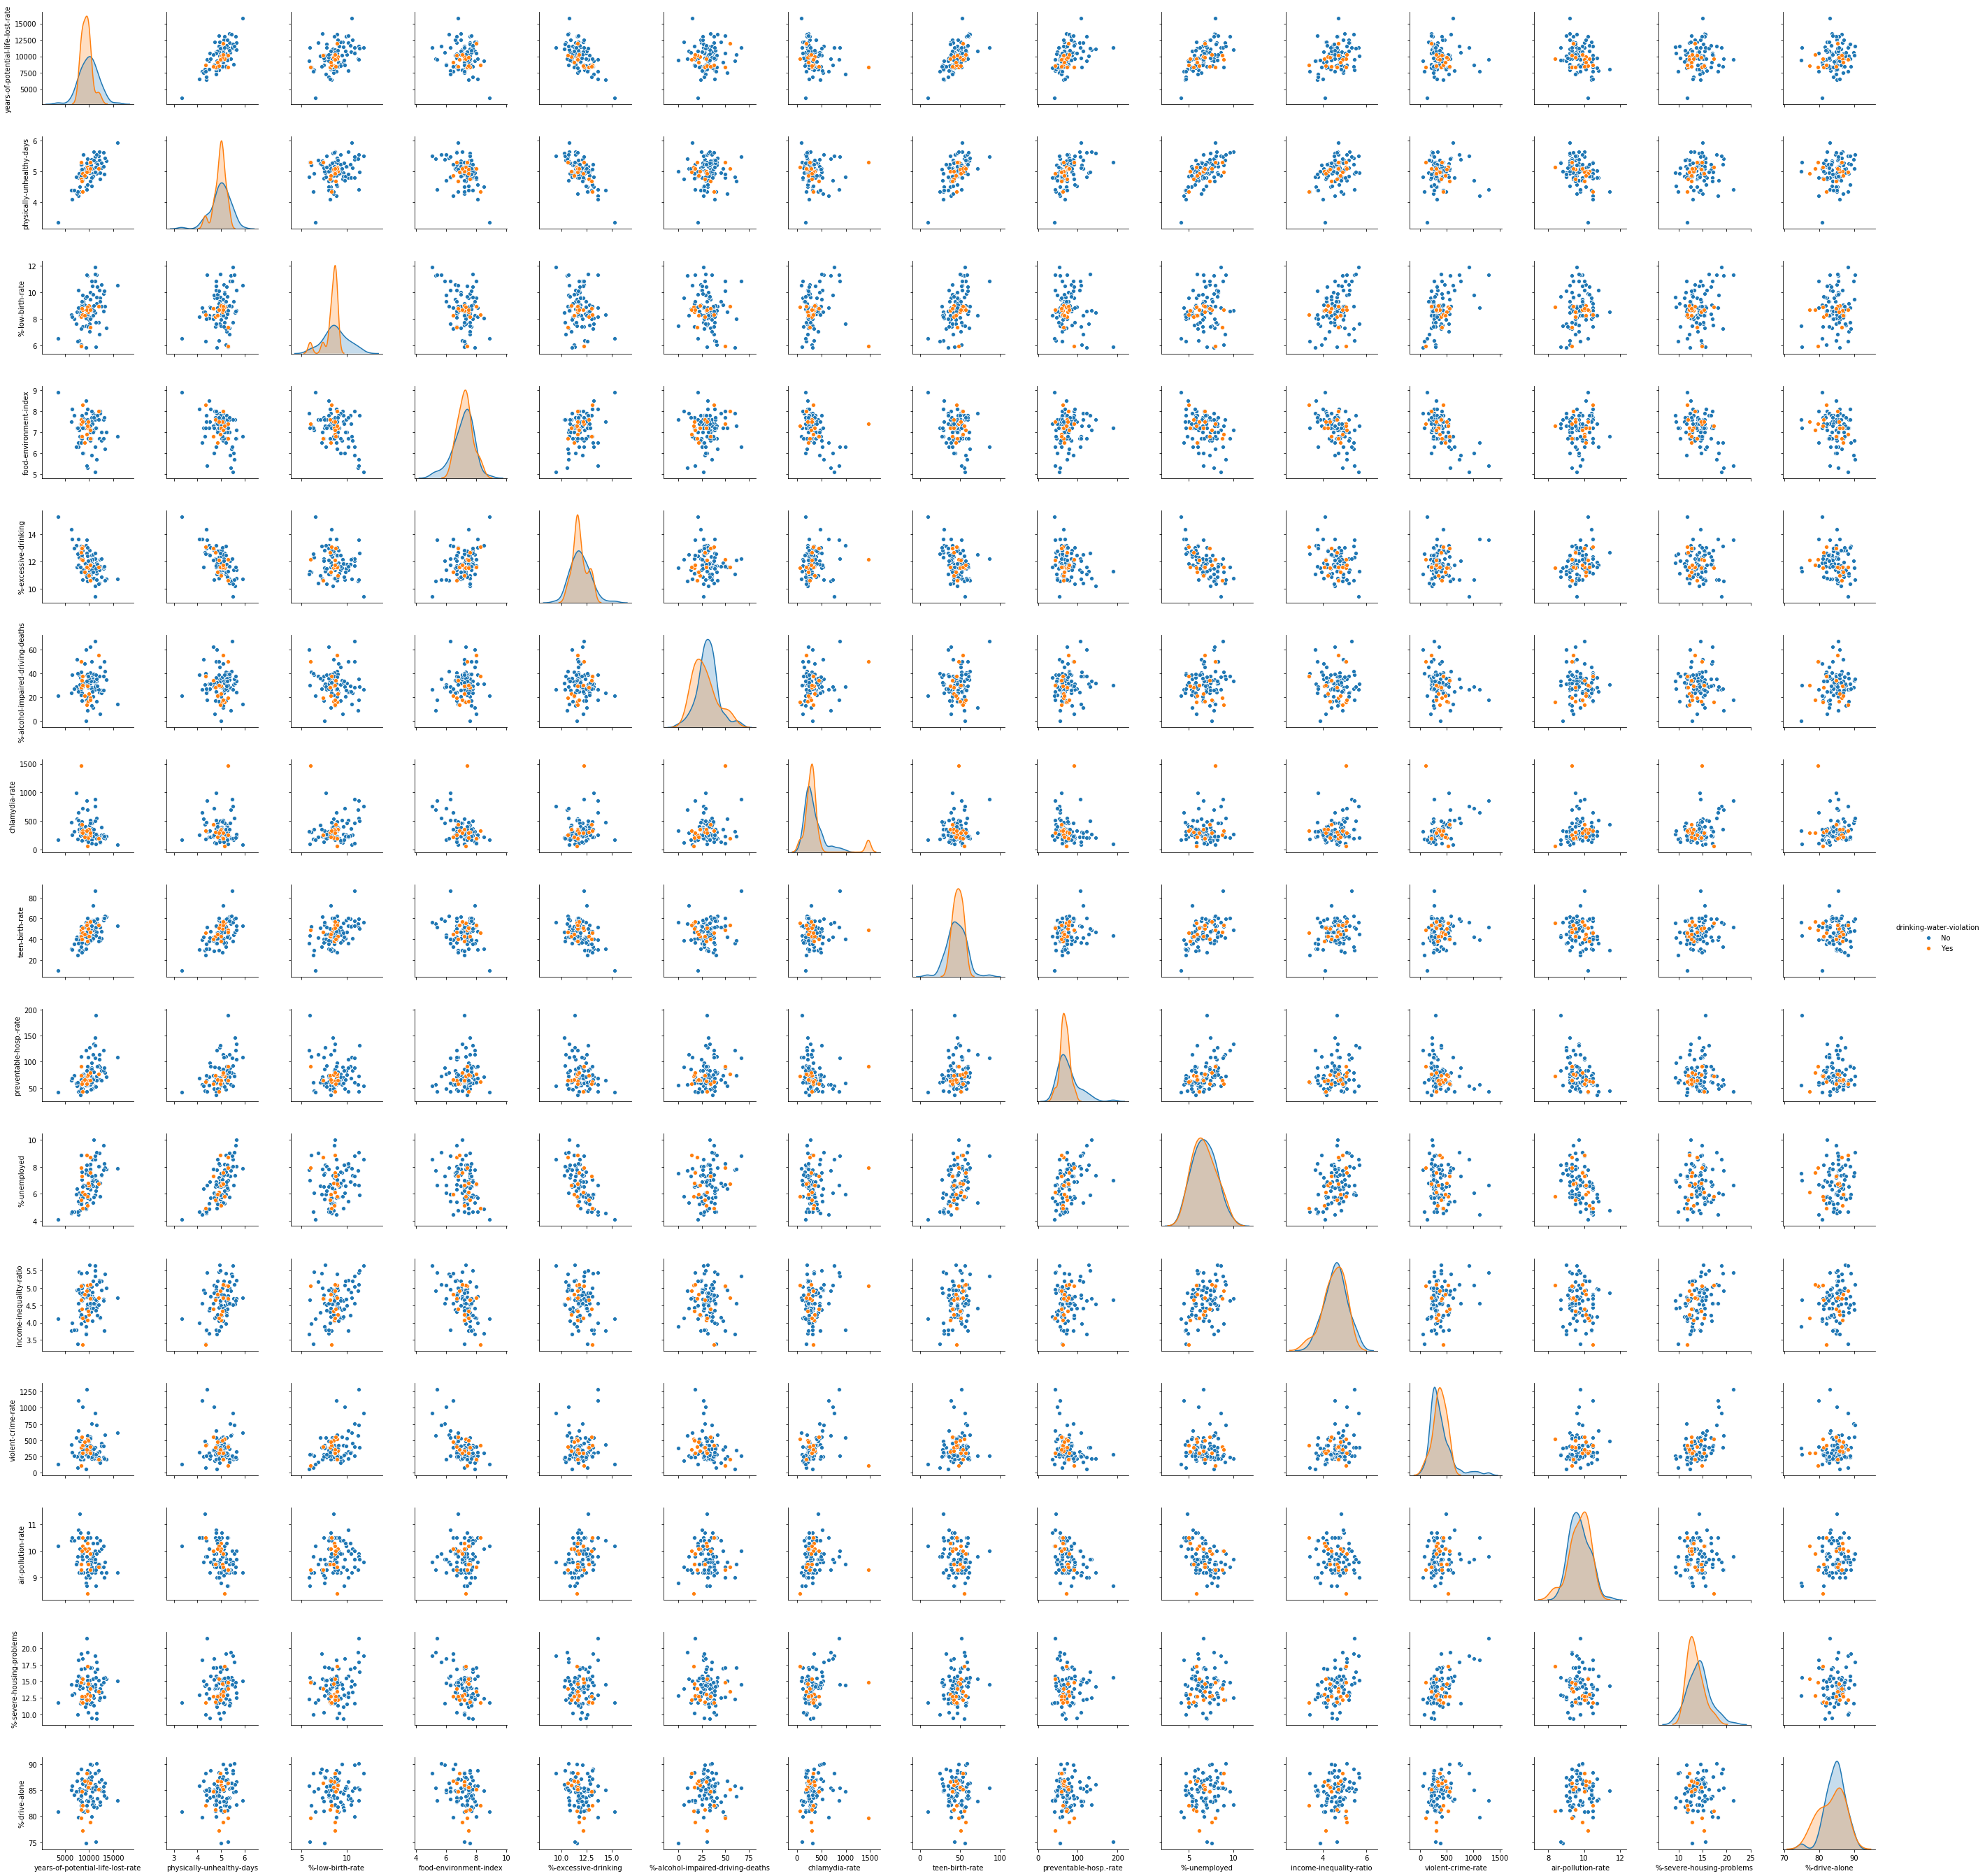

In [149]:
#visualize
g = sns.pairplot(explore_tn, hue='drinking-water-violation')
#plt.savefig('drinking_water_pairplot_two.jpg')

In [127]:
explore_tn['chlamydia-rate'].nlargest(5)

County
Bledsoe       1464.1
Montgomery     986.9
Lake           879.6
Shelby         859.4
Haywood        757.2
Name: chlamydia-rate, dtype: float64

### data with the largest separations in distributions

In [128]:
dist_list = ["County", "Years of Potential Life Lost Rate", "% LBW", "% Alcohol-Impaired",
            "Chlamydia Rate", "Preventable Hosp. Rate", "Violent Crime Rate",
            "Average Daily PM2.5", "% Drive Alone", "% Obese", "% Physically Inactive",
            "% With Access", "Graduation Rate", "% Some College", "% Severe Housing Problems", 
             "Presence of violation"]
water_tn = chrr_tn[dist_list]
water_tn.set_index("County", inplace=True)

dist_list_rename = pd.Series(['years-life-lost', '%-low-birth-weight', "% Alcohol-Impaired",
            "Chlamydia Rate", "Preventable Hosp. Rate", "Violent Crime Rate",
            "av-air-pollution-PM2.5", "% Drive Alone", "% Obese", "% Physically Inactive",
            "% with acccess to exercise", "hs Graduation Rate", "% Some College", 
                    "% Severe Housing Problems", "drinking-water-violation"])
dist_list_rename = dist_list_rename.str.lower()
dist_list_rename = dist_list_rename.str.replace(' ', '-')

water_tn.columns = dist_list_rename
water_tn.head()

,years-life-lost,%-low-birth-weight,%-alcohol-impaired,chlamydia-rate,preventable-hosp.-rate,violent-crime-rate,av-air-pollution-pm2.5,%-drive-alone,%-obese,%-physically-inactive,%-with-acccess-to-exercise,hs-graduation-rate,%-some-college,%-severe-housing-problems,drinking-water-violation
County,,,,,,,,,,,,,,,
Anderson,9749.0,8.254303,28.301887,315.1,55.11,317.728956,10.7,87.123358,31.7,33.1,75.273197,94.313953,54.680670,13.731588,No
Bedford,9113.2,9.047834,47.916667,355.1,74.32,361.225556,10.0,80.900087,32.1,36.5,64.334857,93.000000,38.070236,16.920732,No
Benton,13506.4,7.317073,34.375000,233.3,70.60,205.359684,9.2,83.571555,32.4,37.8,42.761841,92.500000,38.618705,15.384615,No
Bledsoe,8405.9,5.980861,50.000000,1464.1,90.60,108.751942,9.3,79.670799,32.7,36.2,48.353526,82.500000,34.693878,14.818880,Yes
Blount,8011.6,8.252534,26.271186,315.7,55.68,308.934602,10.1,85.309083,34.0,31.8,69.154540,91.985342,58.680019,13.862097,No


In [129]:
water_tn.isnull().sum()

years-life-lost               0
%-low-birth-weight            0
%-alcohol-impaired            0
chlamydia-rate                0
preventable-hosp.-rate        0
violent-crime-rate            0
av-air-pollution-pm2.5        0
%-drive-alone                 0
%-obese                       0
%-physically-inactive         0
%-with-acccess-to-exercise    1
hs-graduation-rate            1
%-some-college                0
%-severe-housing-problems     0
drinking-water-violation      0
dtype: int64

In [130]:
water_tn = water_tn.fillna(water_tn.median())
water_tn.isnull().sum()

years-life-lost               0
%-low-birth-weight            0
%-alcohol-impaired            0
chlamydia-rate                0
preventable-hosp.-rate        0
violent-crime-rate            0
av-air-pollution-pm2.5        0
%-drive-alone                 0
%-obese                       0
%-physically-inactive         0
%-with-acccess-to-exercise    0
hs-graduation-rate            0
%-some-college                0
%-severe-housing-problems     0
drinking-water-violation      0
dtype: int64

### import in 2014 data to test the model on after it's trained

In [131]:
#http://www.countyhealthrankings.org/app/tennessee/2018/rankings/outcomes/overall, year = 2017
chrr_tn_2014 = pd.read_excel(r'./data/2014_CountyHealthRankingsTennesseeData-v6.xls', 
                        sheet_name='Ranked Measure Data', skiprows=[0,2])
chrr_tn_2014.head()

,FIPS,State,County,Deaths,YPLL Rate,95% CI - Low,95% CI - High,Z-Score,Sample Size,% Fair/Poor,...,Workers,% Drive Alone,95% CI - Low.20,95% CI - High.20,Z-Score.32,Workers who Drive Alone,Long Commute - Drives Alone,95% CI - Low.21,95% CI - High.21,Z-Score.33
0,47001.0,Tennessee,Anderson,1126.0,8831.30,8059.766,9602.834,-0.501578,273.0,19.4,...,30889.0,86.674868,85.538782,87.810954,0.886096,26773.0,31.0,28.438991,33.561009,-0.541650
1,47003.0,Tennessee,Bedford,585.0,8755.89,7796.980,9714.800,-0.545841,225.0,22.3,...,18477.0,82.778590,79.779442,85.777737,-0.429895,15295.0,33.0,29.157562,36.842438,-0.362608
2,47005.0,Tennessee,Benton,394.0,12848.86,10829.119,14868.601,1.856558,208.0,20.0,...,5708.0,80.168185,76.297689,84.038681,-1.311574,4576.0,33.6,27.202468,39.997532,-0.308895
3,47007.0,Tennessee,Bledsoe,200.0,8401.68,6474.294,10329.066,-0.753747,119.0,27.0,...,4130.0,80.508475,77.685995,83.330954,-1.196640,3325.0,52.7,43.632930,61.767070,1.400958
4,47009.0,Tennessee,Blount,1660.0,7576.07,7029.132,8123.008,-1.238345,427.0,15.0,...,54567.0,86.200451,84.619064,87.781838,0.725859,47037.0,33.3,31.051902,35.548098,-0.335751


In [132]:
dist_list = ["County", "YPLL Rate", "% LBW", "% Alcohol-Impaired",
            "Chlamydia Rate", "ACSC Rate", "Violent Crime Rate",
            "Average daily PM25", "% Drive Alone", "% Obese", "% Physically Inactive",
            "% With Access", "Graduation Rate", "% Some College", "% Severe Housing Problems", 
             "% pop in viol"]
wtn2014 = chrr_tn_2014[dist_list]
wtn2014.set_index("County", inplace=True)

dist_list_rename = pd.Series(['years-life-lost', '%-low-birth-weight', "% Alcohol-Impaired",
            "Chlamydia Rate", "Preventable Hosp. Rate", "Violent Crime Rate",
            "av-air-pollution-PM2.5", "% Drive Alone", "% Obese", "% Physically Inactive",
            "% with acccess to exercise", "hs Graduation Rate", "% Some College", 
                    "% Severe Housing Problems", "drinking-water-violation"])
dist_list_rename = dist_list_rename.str.lower()
dist_list_rename = dist_list_rename.str.replace(' ', '-')

wtn2014.columns = dist_list_rename
wtn2014.head()

,years-life-lost,%-low-birth-weight,%-alcohol-impaired,chlamydia-rate,preventable-hosp.-rate,violent-crime-rate,av-air-pollution-pm2.5,%-drive-alone,%-obese,%-physically-inactive,%-with-acccess-to-exercise,hs-graduation-rate,%-some-college,%-severe-housing-problems,drinking-water-violation
County,,,,,,,,,,,,,,,
Anderson,8831.30,9.3,20.000000,243.2,52.164079,394.386419,13.41,86.674868,30.9,34.4,52.932955,88.000000,50.451404,11.845507,0.000000
Bedford,8755.89,8.9,34.782609,391.1,113.257231,372.991865,13.94,82.778590,36.0,33.3,44.893249,81.000000,36.509953,17.432052,16.654305
Benton,12848.86,8.6,41.666667,371.3,94.409614,231.087327,14.78,80.168185,34.0,35.2,30.104918,92.500000,40.268456,10.673352,0.000000
Bledsoe,8401.68,7.4,57.142857,248.7,94.710304,107.323555,13.71,80.508475,31.8,37.2,36.929171,77.500000,34.232558,12.415350,90.476190
Blount,7576.07,8.4,17.857143,259.1,83.936013,321.963926,13.38,86.200451,31.9,30.3,39.387042,91.268275,53.693884,12.814123,2.859153


The water quality was reported in terms of % population instead of binary presence the violation, as it was in 2017. I don't know how they calculated the binary vairabile in the 2017 data - the counties with violations present are totally different between the two years, qualitatively. Here, I'm going to check quantitatively how different the counties are.

As a side note, 2014 has data from 2012-2013 while 2017 has data from 2013-2014 ... odd.

In [133]:
dwv = wtn2014[['drinking-water-violation']].copy()
dwv['2017'] = water_tn['drinking-water-violation'].copy()
dwv.head()

,drinking-water-violation,2017
County,,
Anderson,0.000000,No
Bedford,16.654305,No
Benton,0.000000,No
Bledsoe,90.476190,Yes
Blount,2.859153,No


In [134]:
dwv.columns = ['2014', '2017']

yn_dwv = dwv.copy()
make_binary = lambda x: 'Yes' if x > 20  else 'No'
yn_dwv['2014'] = yn_dwv['2014'].apply(make_binary)

yn_dwv.head()

,2014,2017
County,,
Anderson,No,No
Bedford,No,No
Benton,No,No
Bledsoe,Yes,Yes
Blount,No,No


In [135]:
(yn_dwv['2014'] == 'Yes').sum()

12

In [136]:
(yn_dwv['2017'] == 'Yes').sum()

14

I've arbitrairly set the cutoff at >20% violations just to see if this'll work

In [137]:
wtn2014_yn = wtn2014.copy()
wtn2014_yn['drinking-water-violation'] = yn_dwv['2014']
wtn2014_yn.head()

,years-life-lost,%-low-birth-weight,%-alcohol-impaired,chlamydia-rate,preventable-hosp.-rate,violent-crime-rate,av-air-pollution-pm2.5,%-drive-alone,%-obese,%-physically-inactive,%-with-acccess-to-exercise,hs-graduation-rate,%-some-college,%-severe-housing-problems,drinking-water-violation
County,,,,,,,,,,,,,,,
Anderson,8831.30,9.3,20.000000,243.2,52.164079,394.386419,13.41,86.674868,30.9,34.4,52.932955,88.000000,50.451404,11.845507,No
Bedford,8755.89,8.9,34.782609,391.1,113.257231,372.991865,13.94,82.778590,36.0,33.3,44.893249,81.000000,36.509953,17.432052,No
Benton,12848.86,8.6,41.666667,371.3,94.409614,231.087327,14.78,80.168185,34.0,35.2,30.104918,92.500000,40.268456,10.673352,No
Bledsoe,8401.68,7.4,57.142857,248.7,94.710304,107.323555,13.71,80.508475,31.8,37.2,36.929171,77.500000,34.232558,12.415350,Yes
Blount,7576.07,8.4,17.857143,259.1,83.936013,321.963926,13.38,86.200451,31.9,30.3,39.387042,91.268275,53.693884,12.814123,No


In [138]:
#remove NaNs
wtn2014_yn.isnull().sum()

years-life-lost               2
%-low-birth-weight            2
%-alcohol-impaired            2
chlamydia-rate                2
preventable-hosp.-rate        2
violent-crime-rate            2
av-air-pollution-pm2.5        2
%-drive-alone                 2
%-obese                       2
%-physically-inactive         2
%-with-acccess-to-exercise    2
hs-graduation-rate            4
%-some-college                2
%-severe-housing-problems     2
drinking-water-violation      0
dtype: int64

In [139]:
wtn2014_yn = wtn2014_yn.fillna(wtn2014_yn.median())
wtn2014_yn.isnull().sum()

years-life-lost               0
%-low-birth-weight            0
%-alcohol-impaired            0
chlamydia-rate                0
preventable-hosp.-rate        0
violent-crime-rate            0
av-air-pollution-pm2.5        0
%-drive-alone                 0
%-obese                       0
%-physically-inactive         0
%-with-acccess-to-exercise    0
hs-graduation-rate            0
%-some-college                0
%-severe-housing-problems     0
drinking-water-violation      0
dtype: int64

# machine learning to predict the presence of a water violation

## making a decision tree in scikit-learn

In [140]:
#prep data to train/test the model
violation = water_tn.pop("drinking-water-violation")

In [141]:
y = violation
X = water_tn

In [142]:
from sklearn import tree
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=0.4, random_state=42)

clf = tree.DecisionTreeClassifier(criterion='gini',
                                  max_features="auto",
                                  min_samples_leaf=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [143]:
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['actual'], 
            colnames=['prediction'])

prediction,No,Yes
actual,,
No,28,6
Yes,3,1


## applying the model to a normalized form of the 2014 data
__note:__ remember that the 2014 data for drinking water is in % and I binarized it arbitrairly to do this analysis

In [144]:
#break up 2014 data
y_2014 = wtn2014_yn.pop("drinking-water-violation")

In [145]:
x_2014 = wtn2014_yn

In [146]:
pred_2014 = clf.predict(x_2014)
pd.crosstab(y_2014, pred_2014, rownames=['actual'], 
            colnames=['prediction'])

prediction,No,Yes
actual,,
No,74,11
Yes,8,4


## attempting to build a random forest model

In [147]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=4, criterion='gini')
rf.fit(X_train, y_train)

preds = rf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['actual'], 
            colnames=['prediction'])

prediction,No
actual,
No,34
Yes,4


In [148]:
pred_2014 = rf.predict(x_2014)
pd.crosstab(y_2014, pred_2014, rownames=['actual'], 
            colnames=['prediction'])

prediction,No,Yes
actual,,
No,83,2
Yes,11,1
